# STOCK/CRPYTO PRICE PREDICTION MODEL

## The following code is an example on how to use simple data analysis tolls in order to set up a simple strategy for long and short term financial trading

### We will make use of the programing language python (3.x) which suits nicely for data anlysis

## --> This a very is simplified model for trading. One should always invest just as much money as one can afford to loose and do own studies in advance. 

## Required modules:
- numpy: the code is designed to be vectorized such that the numpy module can be used and calculations performed fast
- pandas: module for illustrative data frames
- yfinance: api module provided by yahoo finance to get current and previous asset prices
- matplotlib: (sub)module(s) for plots
- scipy: (sub)module for statistical and signal analysis

### CELLS YOU DO NOT NEED TO EXECUTE:

In [18]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### CELLS YOU CAN EXECUTE OPTIONALLY: 

#### --> This does not toggle the output of a cell:

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### CELLS YOU NEED TO EXECUTE IN ORDER TO BE UP-TO-DATE:

In [3]:
your_path_to_folder_called_FINANCE = '###INSERT YOUR PATH HERE###'
import sys
sys.path.append(your_path_to_folder_called_FINANCE)

In [3]:
from model import MODEL
import utils, plotting, statistics
import pandas as pd

### CELLS YOU CAN MODIFY:

#### WARNING: Do not mix tickers from different markets/timezones. This can result in various NaN values if a filter is applied!

In [4]:
start_date = '2020-01-01' #your start date for the model.
day_hour = 18 #your intra-day time at which to evaluate the model.
tickers = ['BTC-USD', 'LTC-USD'] #your tickers of interest.
tickers = 'BTC-USD'

### The main part starts here:

In [14]:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
model.data.tail(2)

[*********************100%***********************]  1 of 1 completed


,BTC-USD
Datetime,
2020-06-01 19:00:00+01:00,9579.135742
2020-06-01 19:20:29+01:00,9577.473633


In [27]:
start_date_range = pd.Timestamp(2020, 1, 1, day_hour)
date_range = utils.create_date_range(start_date=start_date_range)
model.apply_date_filter(date_range, force_apply=True)
model.data.tail()

[INFO]: filter applied.


,BTC-USD
Datetime,
2020-05-28 18:00:00+01:00,9472.532227
2020-05-29 18:00:00+01:00,9433.040039
2020-05-30 18:00:00+01:00,9543.111328
2020-05-31 18:00:00+01:00,9512.514648
2020-06-01 18:00:00+01:00,9578.904297


In [33]:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 0.3                                  |
|                  Authors: Marco Rosenzweig & Patrick Lorenz                  |
--------------------------------------------------------------------------------
|                             ticker = ['BTC-USD']                             |
|                            start date = 01/01/20                             |
|                             end date = 06/01/20                              |
|                     initial investment per ticker = 200                      |
[TICKER]: BTC-USD
[INFO]: No tax paid.
--------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 6.3608992677%
[SUMMARY]: Average trade loss: -1.0740188795%
[SUMMARY]: Efficiency: 80.77%
[SUMMARY]: NET WIN: 475.31


[INFO]: New sell signal was detected for last value: 9578.904296875.


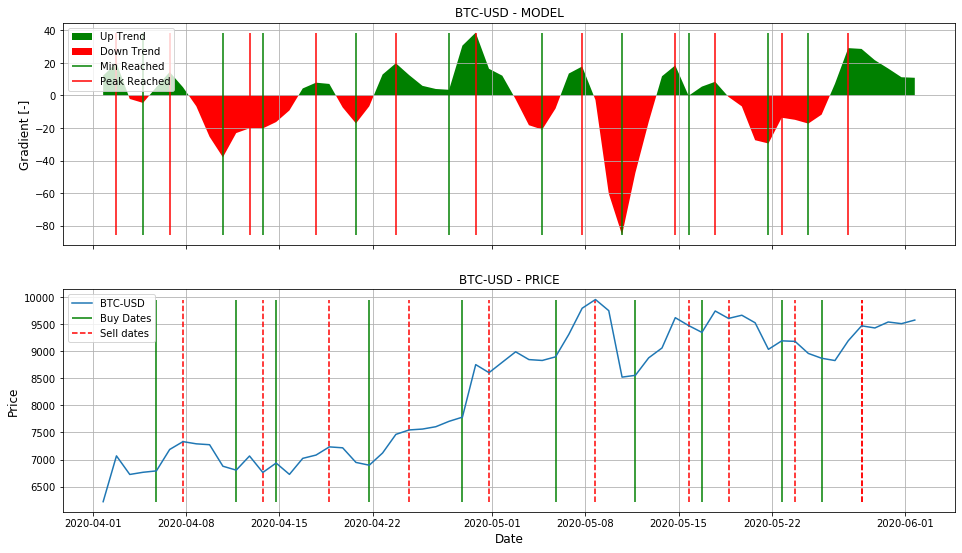

In [30]:
plotting.plot_model(model, tickers='BTC-USD', plot_from_date='2020-04-01')

In [31]:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 9578.904296875}
[INFO]: Break values: {'BTC-USD': array([9661.28287383, 9670.86177813])}
[INFO]: Tolerances: {'BTC-USD': array([82.37857695, 91.95748125])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************


[INFO]: Current ticker: BTC-USD
--------------------------------------------------------------------------------
[INFO]: Result for value: 9540.516837905952
[INFO]: New sell signal was detected for last value: 9540.516837905952.


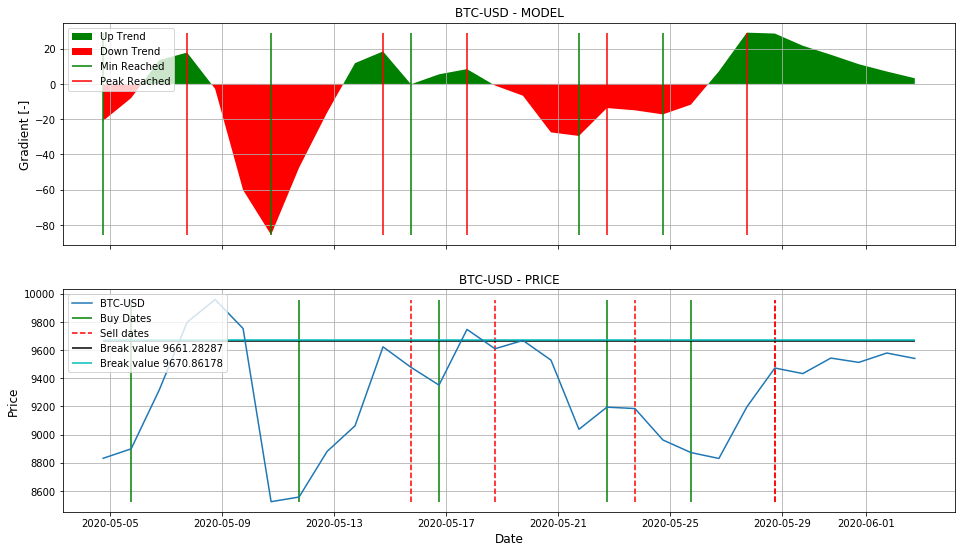

--------------------------------------------------------------------------------
[INFO]: Result for value: 9666.07232597725


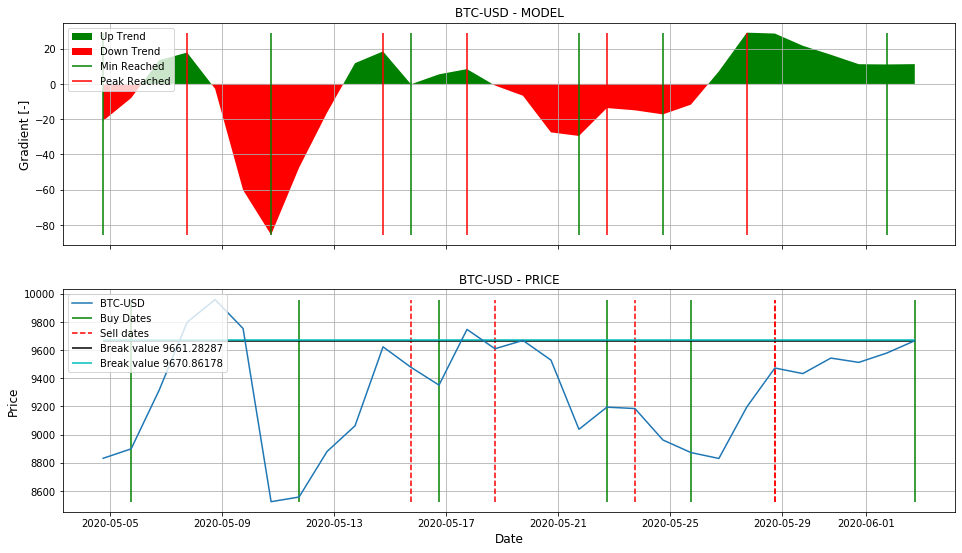

--------------------------------------------------------------------------------
[INFO]: Result for value: 9791.74755035226


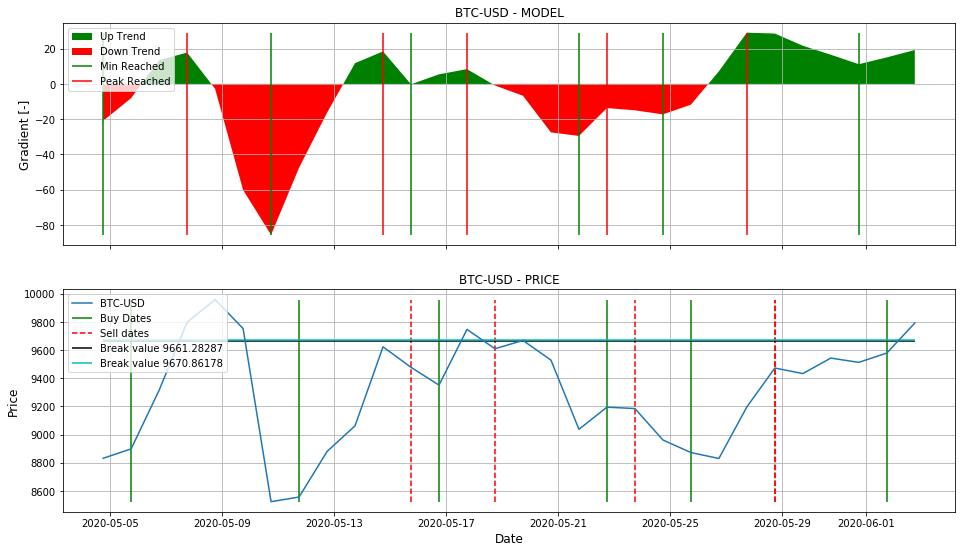

In [32]:
imag_model.show_possibilities(plot_from_date='2020-05-04', switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 9589.2451171875!
[STATS-INFO]: New tolerances: [87.21662695 89.13465703]!
[STATS-EVAL]: Probability for tol=87.21663: 39.73%
[STATS-EVAL]: Probability for tol=89.13466: 39.50%
[STATS-EVAL]: Probability between: 0.23%


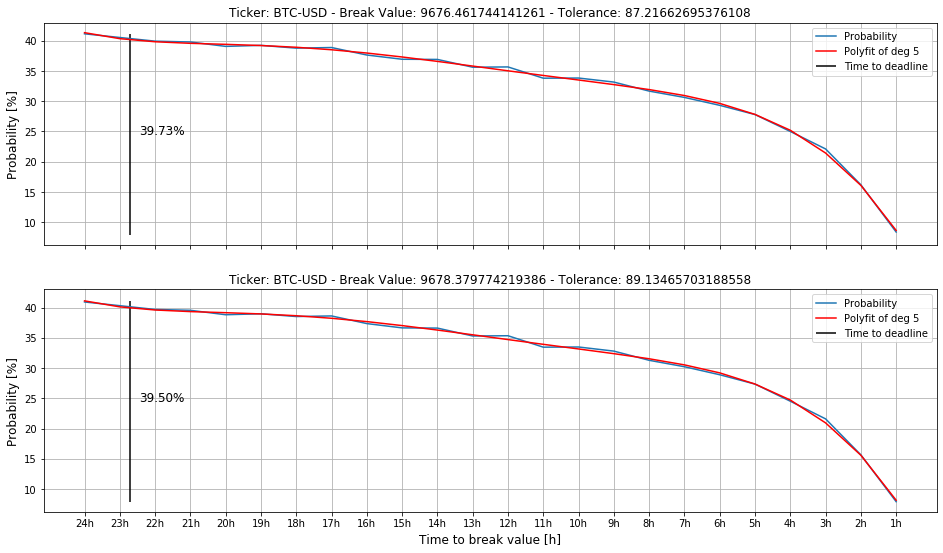

In [13]:
statistics.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)

In [ ]:
br = pd.read_csv('https://btc.com/stats/diff/export')
blocks = br['height']

In [ ]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values

In [ ]:
halving_values = np.arange(1, 10)
halving_times = 210000
halvings = halving_times * halving_values
#3 halvings
indices = np.zeros(4, dtype='int64')
for index in range(4):
    indices[index] = np.where(blocks < halvings[index])[0][-1]

In [ ]:
rewards = np.empty_like(blocks, dtype='float64')
rewards[:indices[0]] = 50
rewards[indices[0]:indices[1]] = 25
rewards[indices[1]:indices[2]] = 12.5
rewards[indices[2]:] = 6.25

In [ ]:
total_btc = rewards * blocks
total_btc[indices[0]:indices[1]] = 210000*50 + (blocks[indices[0]:indices[1]] - 210000)*rewards[indices[0]:indices[1]]
total_btc[indices[1]:indices[2]] = 210000*50 + 210000*25 + (blocks[indices[1]:indices[2]] - 420000)*rewards[indices[1]:indices[2]]
total_btc[indices[2]:] = 210000*50 + 210000*25 + 210000*12.5 + (blocks[indices[2]:] - 630000)*rewards[indices[2]:]

In [ ]:
#subtract 1e6 satoshi btc
SF = (total_btc.values[total_btc.diff(26).dropna().shape[0]]-1e6) / total_btc.diff(26).dropna()

In [ ]:
import math
s2f_model_price = math.exp(-1.84)* SF ** 3.36
sf_model = pd.DataFrame(data={'Stock to Flow':SF, 'Price':s2f_model_price})
sf_model

In [ ]:
plt.plot(s2f_model_price, label='Stock to Flow Model')
plt.legend()
plt.grid()
plt.show()

In [ ]:
tickers = 'BTC-USD'
grad_at_sell = model.ticker_df[tickers]['Grad at Sell'].dropna().to_numpy()
max_length = grad_at_sell.shape[0]
grad_at_buy = model.ticker_df[tickers]['Grad at Buy'].to_numpy()[:max_length]
grad_diff = model.ticker_df[tickers]['Grad Difference'].to_numpy()[:max_length]
trade_efficiency = model.ticker_df[tickers]['Trade Efficiency'].to_numpy()[:max_length] * 100
#Get linear regression model
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(grad_diff, trade_efficiency)
#Plot stuff
plt.figure(figsize=(6, 6))
plt.scatter(grad_diff, trade_efficiency, label='Grad Diff at Trade Win')
plt.plot(grad_diff, grad_diff*slope + intercept, color='r', label='Linear Regression')
plt.xlabel('Grad Diff [-]')
plt.ylabel('Trade Win [%]')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Create DataFrame of Interest
eval_df = pd.DataFrame(data={'Grad at Sell': grad_at_sell, 'Grad at Buy': grad_at_buy, \
                             'Grad Diff': grad_diff, 'Trade Efficiency': trade_efficiency})
eval_df

In [ ]:
#Stats of DataFrame
eval_df.describe()

In [ ]:
#Box Plots
eval_df.boxplot(column=['Grad Diff', 'Trade Efficiency'])

In [ ]:
#Correlation Matrix
eval_df.corr()

### Optional: Export model and eval DataFrame to csv file:

In [ ]:
csv_name_model = 'OUTPUT/model_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
model.ticker_df['BTC-USD'].to_csv(csv_name_model)

In [ ]:
csv_name_eval = 'OUTPUT/eval_{}_{}_{}.csv'.format(tickers, start_date, day_hour)
eval_df.to_csv(csv_name_eval)

In [ ]:
grad_over_20 = (model.ticker_df[tickers]['Grad at Buy'] > 20)

In [ ]:
model.ticker_df[tickers].loc[grad_over_20]